In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
from pycaret.regression import setup, compare_models, evaluate_model, plot_model, get_config


In [2]:
data = pd.read_csv('data.csv', sep=";")
data.head()


,Y,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9
0,13500,23,46986,1.0,90,1,0,2000,3,1165
1,13750,23,72937,1.0,90,1,0,2000,3,1165
2,13950,24,41711,1.0,90,1,0,2000,3,1165
3,14950,26,48000,1.0,90,0,0,2000,3,1165
4,13750,30,38500,1.0,90,0,0,2000,3,1170


In [41]:
data["Y"].nunique(), data.shape

(236, (1436, 10))

In [3]:
s = setup(data, target = 'Y', feature_selection=True)

,Description,Value
0,session_id,8793
1,Target,Y
2,Original Data,"(1436, 10)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1005, 34)"


In [ ]:
# Here it should run K-fold training together with the feature-selection algo.
# --> that is how it chooses a model
# ** se litt mere på hvordan pycaret gjør den model-selection biten

In [32]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,812.4876,1149587.1666,1067.3582,0.9149,0.1046,0.0808,0.0160
rf,Random Forest Regressor,835.0439,1212129.5178,1097.8456,0.9104,0.1110,0.0844,0.0970
et,Extra Trees Regressor,883.9860,1357353.8861,1161.4756,0.8995,0.1156,0.0888,0.0880
lightgbm,Light Gradient Boosting Machine,878.3875,1404539.3810,1180.7338,0.8967,0.1145,0.0873,0.0110
ada,AdaBoost Regressor,962.7047,1536762.8605,1236.0114,0.8862,0.1247,0.0981,0.0180
llar,Lasso Least Angle Regression,956.1916,1751487.3514,1313.2527,0.8707,0.1226,0.0936,0.0060
lasso,Lasso Regression,961.6186,1777289.6078,1320.3979,0.8687,0.1232,0.0940,0.0060
br,Bayesian Ridge,963.4955,1783450.2831,1322.5502,0.8682,0.1240,0.0945,0.0060
ridge,Ridge Regression,964.7634,1794194.4510,1326.2811,0.8674,0.1251,0.0949,0.0050
lr,Linear Regression,972.6288,1852538.7871,1342.9240,0.8630,0.1255,0.0950,0.0060


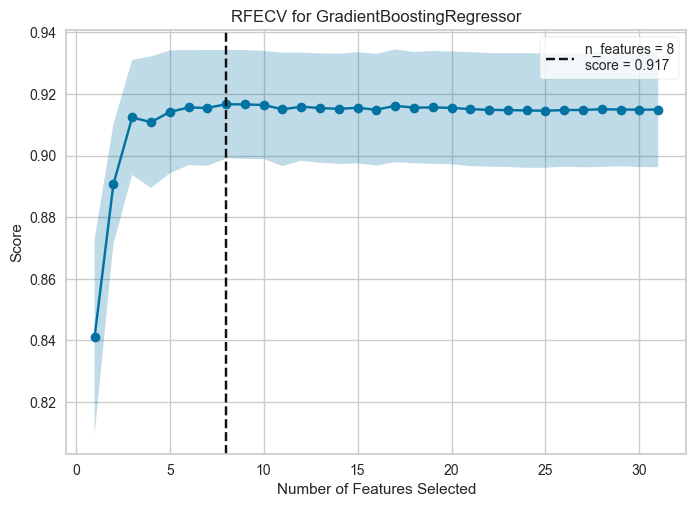

In [44]:
plot_model(best, plot = "rfe")   # 

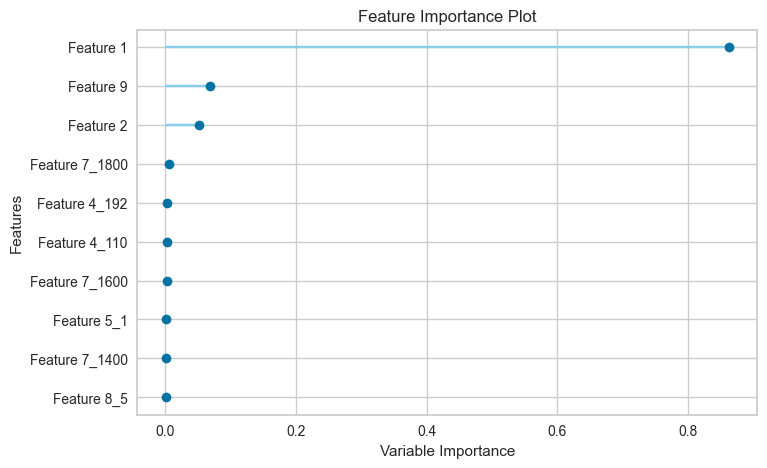

In [45]:
plot_model(best, plot = "feature")

In [7]:
(data["Feature 4"] == 192).sum(), (data["Feature 4"] == 110).sum()

(11, 835)

In [48]:
prep_pipe = get_config('prep_pipe')

In [53]:
res = prep_pipe.transform(data)[["Feature 1", "Feature 2", "Feature 9", "Feature 7_1800", 
                           "Feature 4_192", "Feature 4_110", "Feature 7_1600", "Feature 5_1",
                           "Feature 7_1400", "Feature 8_5"]]
# Er modellen forvirret her eller noe?
res

,Feature 1,Feature 2,Feature 9,Feature 7_1800,Feature 4_192,Feature 4_110,Feature 7_1600,Feature 5_1,Feature 7_1400,Feature 8_5
0,23.0,46986.0,1165.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,23.0,72937.0,1165.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,24.0,41711.0,1165.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,26.0,48000.0,1165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,38500.0,1170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1431,69.0,20544.0,1025.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1432,72.0,19000.0,1015.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1433,71.0,17016.0,1015.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1434,70.0,16916.0,1015.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [54]:
type(res)

pandas.core.frame.DataFrame

In [56]:
profile = ProfileReport(res, title="Transformed GradientBoostEstimator Data Profile")
profile.to_file("GradientBoostEstimatorDataProfile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

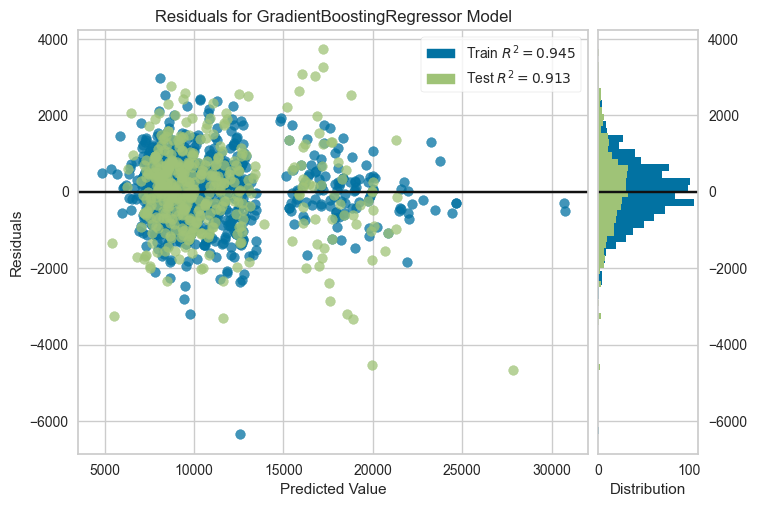

In [30]:
plot_model(best, plot = "residuals")

In [24]:
plot_model(best, plot = 'feature')

IntProgress(value=0, description='Processing: ', max=5)

ValueError: All arrays must be of the same length

In [ ]:
plot_model(best, plot = "feature importance")


In [11]:
best

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=405, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [7]:
data[data["Y"] < 0]

,Y,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9


In [8]:
logtarget_data = data.copy(deep=True)
logtarget_data["Y"] = logtarget_data["Y"].apply(np.log)
logtarget_data.head()

,Y,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9
0,9.510445,23,46986,1.0,90,1,0,2000,3,1165
1,9.528794,23,72937,1.0,90,1,0,2000,3,1165
2,9.543235,24,41711,1.0,90,1,0,2000,3,1165
3,9.612467,26,48000,1.0,90,0,0,2000,3,1165
4,9.528794,30,38500,1.0,90,0,0,2000,3,1170


In [9]:
log_s = setup(logtarget_data, target = 'Y')

,Description,Value
0,session_id,754
1,Target,Y
2,Original Data,"(1436, 10)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1005, 34)"


In [10]:
log_best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0799,0.0110,0.1049,0.8731,0.0103,0.0087,0.0170
lightgbm,Light Gradient Boosting Machine,0.0845,0.0125,0.1117,0.8571,0.0110,0.0092,0.0110
rf,Random Forest Regressor,0.0853,0.0125,0.1115,0.8567,0.0110,0.0093,0.1000
br,Bayesian Ridge,0.0858,0.0127,0.1123,0.8522,0.0110,0.0093,0.0060
et,Extra Trees Regressor,0.0868,0.0128,0.1128,0.8514,0.0111,0.0095,0.0930
lr,Linear Regression,0.0860,0.0128,0.1127,0.8510,0.0111,0.0094,0.0060
ridge,Ridge Regression,0.0859,0.0129,0.1129,0.8504,0.0111,0.0094,0.0050
ada,AdaBoost Regressor,0.0900,0.0138,0.1172,0.8411,0.0115,0.0098,0.0170
omp,Orthogonal Matching Pursuit,0.0902,0.0156,0.1245,0.8196,0.0123,0.0098,0.0050
en,Elastic Net,0.0935,0.0167,0.1287,0.8060,0.0126,0.0102,0.0050
